In [25]:
from PIL import Image, ImageFont, ImageDraw, ImageOps
import requests

In [3]:
img = Image.open("talk-image-template.png")

In [5]:
font_type = "GothamRoundedMedium_21022.ttf"

In [6]:
title_font = ImageFont.truetype(font_type, size=10)

inner_box=(588, 238)


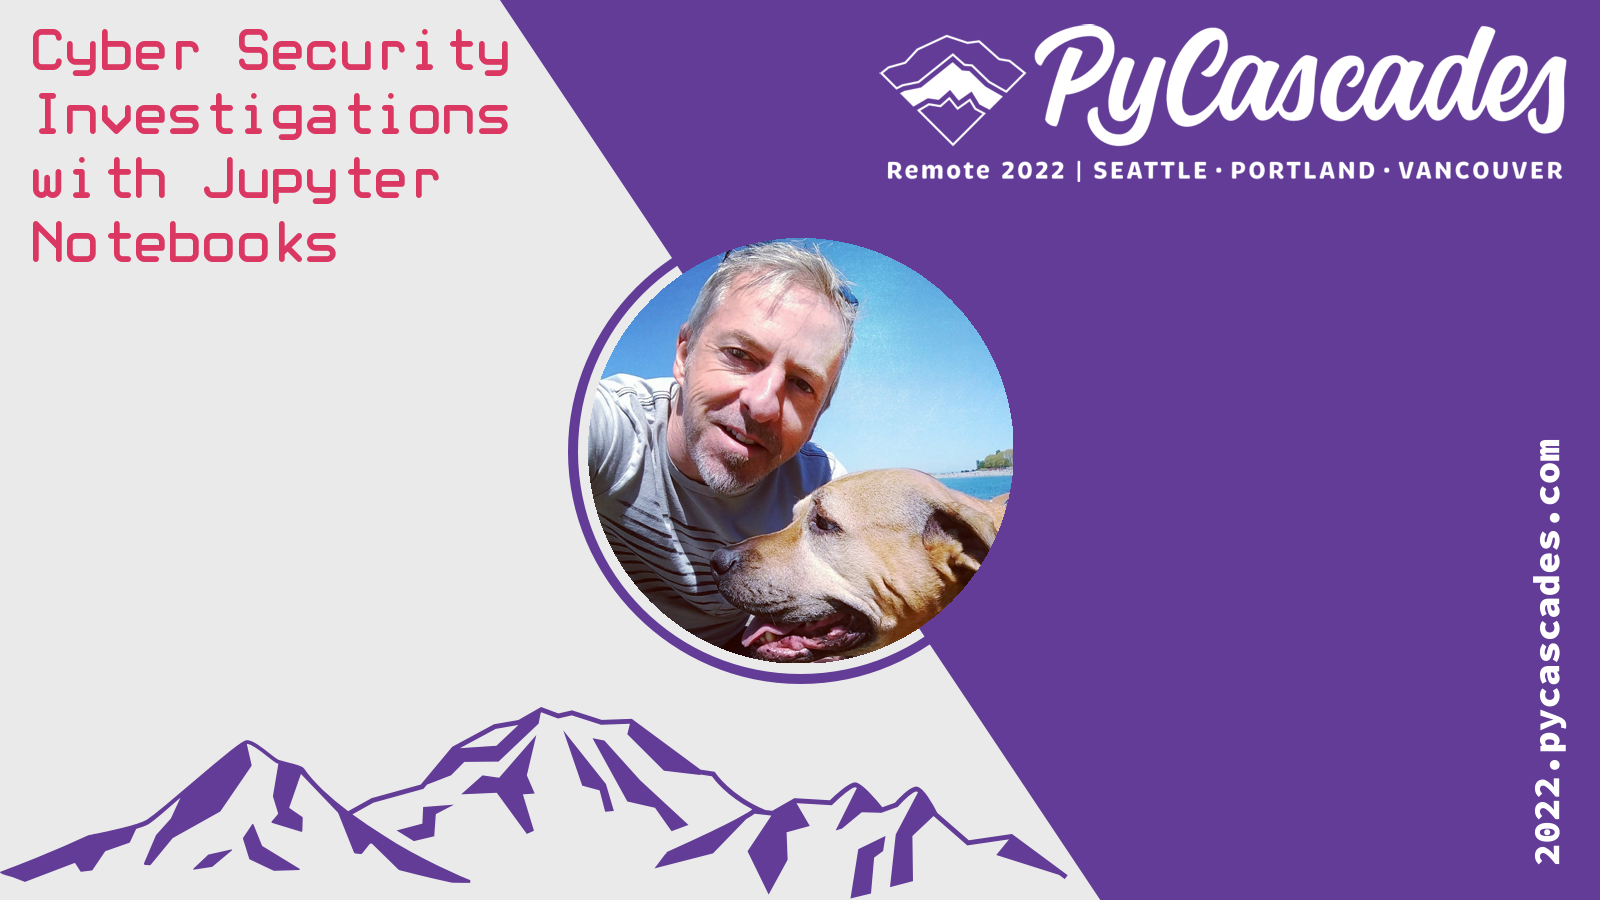

In [60]:
title_font = ImageFont.truetype("fonts/WHITRABT.TTF", size=60)
template = Image.open("talk-image-template.png")
# Add text
drawing = ImageDraw.Draw(template)
drawing.text(xy=(30, 30),
             text="Cyber Security \nInvestigations \nwith Jupyter \nNotebooks",
             fill=(218, 55, 99),
             font=title_font,
             spacing=24
            )

# Add pfp
size = (425, 425)
pfp = Image.open("ian-hellen.png")
# Resize, center, and crop
# https://gist.github.com/sigilioso/2957026#gistcomment-1409714
pfpo = ImageOps.fit(pfp, size)
# Crop to a circle
# https://stackoverflow.com/a/890114/3277713
mask = Image.new("L", size, 0)
ellipse = ImageDraw.Draw(mask)
ellipse.ellipse((0, 0) + size, fill=255)
# pfpo.paste(0, mask=mask)
pfpo.putalpha(mask)
pfpo.convert('P', palette=Image.ADAPTIVE)


# Determine where to paste in the new image
y = (900 // 2) - (size[0] // 2)
x = (1600 // 2) - (size[1] // 2)
inner_box = (x, y)
print(f"{inner_box=}")

template.paste(pfpo, inner_box, mask=mask)


display(template)